In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'SBP': [120, 125, 130, 121, 135, 140],
    'chol': [126, 128, 128, 130, 130, 132],
    'Age': [38, 40, 42, 42, 44, 46]
}


In [175]:

# Q1
df = pd.DataFrame(data)

mean_chol =  df['chol'].mean()
mean_age = df['Age'].mean()
print(mean_chol)
print(mean_age)

129.0
42.0


In [176]:
# Q1
chol_centrelize = chol - mean_chol
age_centrelize = age - mean_age


correlation_coef = (chol_centrelize * age_centrelize).sum() / np.sqrt((chol_centrelize**2).sum() * (age_centrelize**2).sum())

centered_data = df[['chol', 'Age']] - df[['chol', 'Age']].mean()



In [177]:

for i in range(2):
    for j in range(2):
        cov_matrix[i, j] = (1/6) * (centered_data.iloc[:, i] * centered_data.iloc[:, j]).sum()
print(cov_matrix)
val_prop, vect_propre = np.linalg.eig(cov_matrix)
print(val_prop)
print("###################")
print(vect_propre)
print("###################")
pc1 = vect_propre[:, np.argmax(val_prop)]
 
vectprop_chol = vect_propre[:, 1]
vectprop_age = vect_propre[:, 0]

pc1_expression = f"PC1 = {vectprop_chol[0]:.4f} * chol + {vectprop_age[0]:.4f} * Age"

print(pc1_expression)

[[3.66666667 4.66666667]
 [4.66666667 6.66666667]]
[ 0.26485294 10.06848039]
###################
[[-0.80808699 -0.58906316]
 [ 0.58906316 -0.80808699]]
###################
PC1 = -0.5891 * chol + -0.8081 * Age


In [178]:

df['PC1'] = vectprop_chol[0] * df['chol'] + vectprop_age[0] * df['Age']

mean_pc1 = df['PC1'].mean()

variance_pc1 = ((df['PC1'] - mean_pc1)**2).sum() / (len(df) - 1)
print(variance_pc1)

print(df)

y = df['SBP']
X = df['PC1']

mean_X = np.mean(X)
mean_y = np.mean(y)

diff_X = X - mean_X
diff_y = y - mean_y

B1 = np.sum(diff_X * diff_y) / np.sum(diff_X**2)
B2 = mean_y - B1 * mean_X



12.082176467941109
   SBP  chol  Age         PC1
0  120   126   38 -104.929264
1  125   128   40 -107.723565
2  130   128   42 -109.339739
3  121   130   42 -110.517865
4  135   130   44 -112.134039
5  140   132   46 -114.928339


In [179]:
# Display the results
print(f"Estimation of B1: {B1}")
print(f"Estimation of B2: {B2}")

age_new = 40
chol_new = 125



Estimation of B1: -1.9324589847298843
Estimation of B2: -83.93290064303116


SBP prediction for a person with age=40 and chol=125: 120.82344844893012


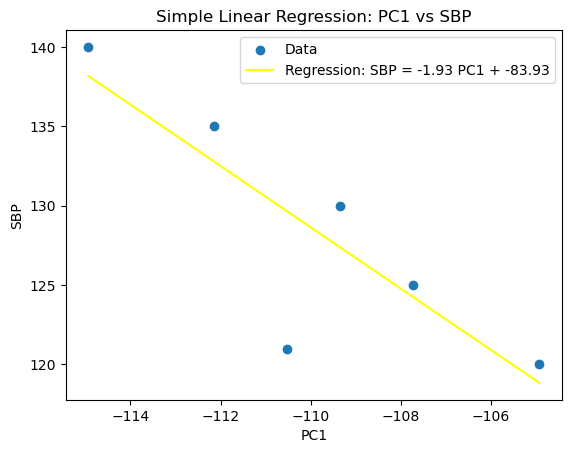

In [180]:

SBP_prediction_new = B1 * (vectprop_chol[0] * chol_new + vectprop_age[0] * age_new) + B2

print(f"SBP prediction for a person with age={age_new} and chol={chol_new}: {SBP_prediction_new}")

plt.scatter(X, y, label='Data')

x_values = np.linspace(min(X), max(X), 100)
y_values = B1 * x_values + B2
plt.plot(x_values, y_values, color='yellow', label=f'Regression: SBP = {B1:.2f} PC1 + {B2:.2f}')

plt.xlabel('PC1')
plt.ylabel('SBP')
plt.legend()
plt.title('Simple Linear Regression: PC1 vs SBP')

plt.show()